In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Load the new CSV file
new_file_path_2 = "~/Downloads/history(2).csv"
df = pd.read_csv(new_file_path_2)


In [52]:
df

,entity_id,state,last_changed
0,sensor.atesspcs_load_active_power,261.0,2025-03-10T08:00:00.000Z
1,sensor.atesspcs_load_active_power,243.0,2025-03-10T08:00:12.899Z
2,sensor.atesspcs_load_active_power,291.0,2025-03-10T08:00:51.308Z
3,sensor.atesspcs_load_active_power,247.0,2025-03-10T08:01:29.705Z
4,sensor.atesspcs_load_active_power,248.0,2025-03-10T08:02:07.898Z
...,...,...,...
3240,sensor.atesspcs_battery_power,176.0,2025-03-10T13:47:04.496Z
3241,sensor.atesspcs_battery_power,177.0,2025-03-10T13:47:41.098Z
3242,sensor.atesspcs_battery_power,176.0,2025-03-10T13:48:17.695Z
3243,sensor.atesspcs_battery_power,175.0,2025-03-10T13:48:54.298Z


In [53]:
pd.unique(df["entity_id"])

array(['sensor.atesspcs_load_active_power',
       'sensor.atesspcs_output_active_power',
       'sensor.atesspcs_bypass_active_power',
       'sensor.atesspcs_system_battery_power', 'sensor.total_pv_power',
       'sensor.atesspcs_battery_power'], dtype=object)

In [54]:

# Convert timestamp to datetime and state to numeric
df["last_changed"] = pd.to_datetime(df["last_changed"])
df["state"] = pd.to_numeric(df["state"], errors="coerce")

# Filter out values greater than 6000
# df[df["state"] > 6000]["state"] = 0
# Assuming your dataframe is called df and your column is 'column_name'
df_new_2_filtered = df
# df_new_2_filtered.loc[df['state'] > 6000, 'state'] = 0
df_new_2_filtered.loc[df['state'] > 6000, 'state'] =  df_new_2_filtered.loc[df['state'] > 6000, 'state'] - 6553.5 
# df_new_2_filtered = df[df["state"] <= 6000]

# Separate load power, output power, and bypass power
load_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.atesspcs_load_active_power"]
output_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.atesspcs_output_active_power"]
bypass_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.atesspcs_bypass_active_power"]
system_batt_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.atesspcs_system_battery_power"]
total_pv_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.total_pv_power"]
battery_power = df_new_2_filtered[df_new_2_filtered["entity_id"] == "sensor.atesspcs_battery_power"]

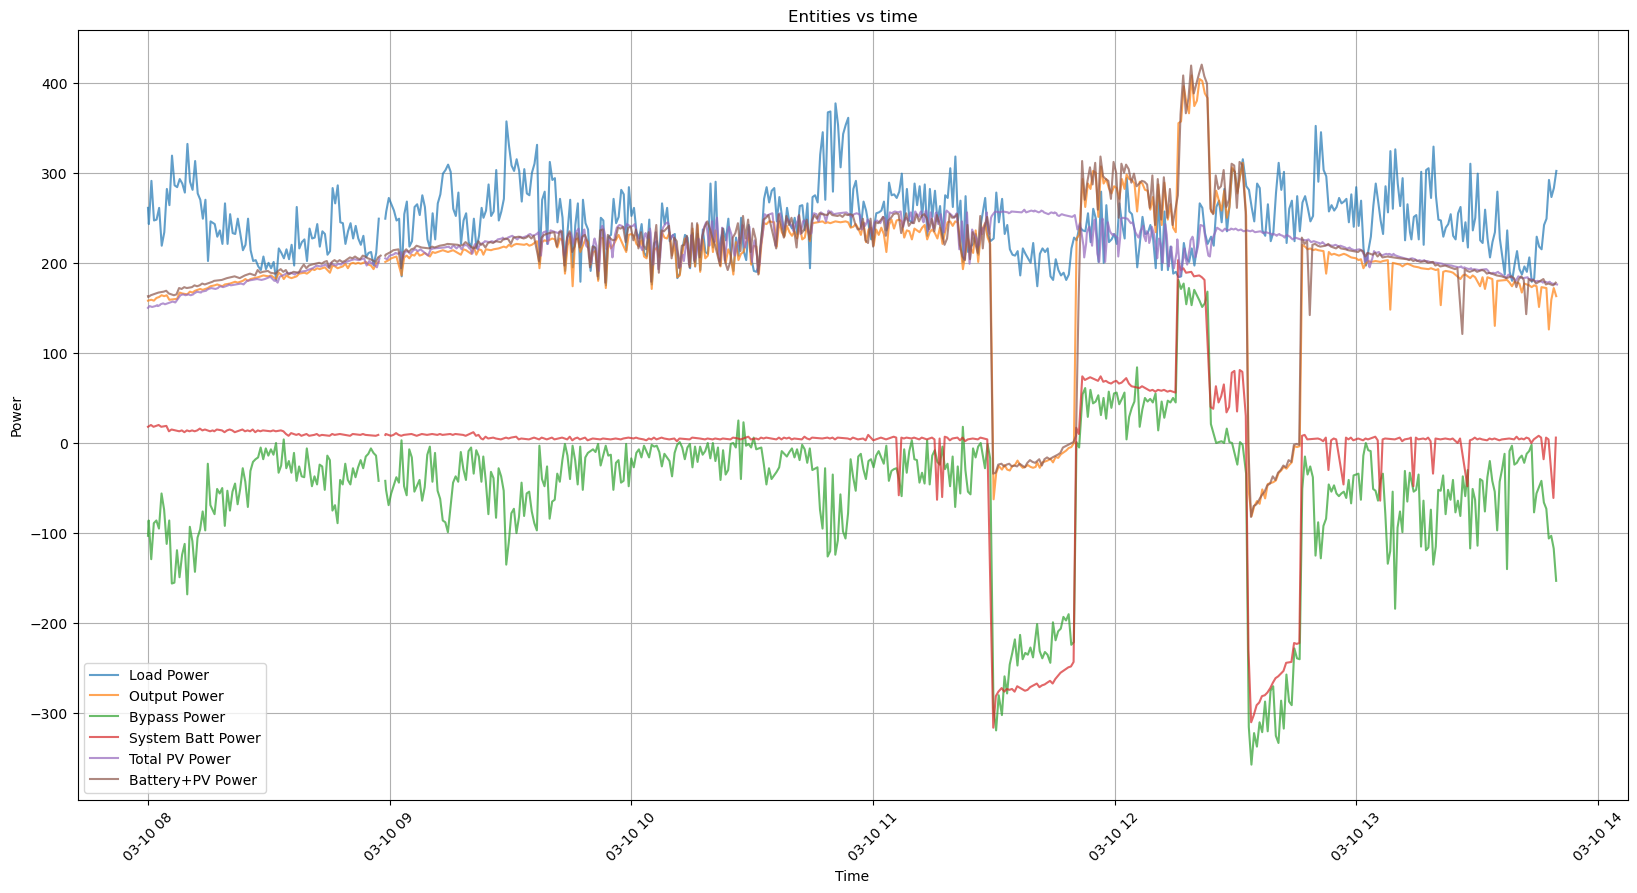

In [55]:

# Plot data
plt.figure(figsize=(20, 10))
plt.plot(load_power["last_changed"], load_power["state"], label="Load Power", alpha=0.7)
plt.plot(output_power["last_changed"], output_power["state"], label="Output Power", alpha=0.7)
plt.plot(bypass_power["last_changed"], bypass_power["state"], label="Bypass Power", alpha=0.7)
plt.plot(system_batt_power["last_changed"], system_batt_power["state"], label="System Batt Power", alpha=0.7)
plt.plot(total_pv_power["last_changed"], total_pv_power["state"], label="Total PV Power", alpha=0.7)
plt.plot(battery_power["last_changed"], battery_power["state"], label="Battery+PV Power", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Entities vs time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [56]:
output_power

,entity_id,state,last_changed
553,sensor.atesspcs_output_active_power,158.0,2025-03-10 08:00:00+00:00
554,sensor.atesspcs_output_active_power,159.0,2025-03-10 08:00:49.502000+00:00
555,sensor.atesspcs_output_active_power,158.0,2025-03-10 08:01:27.897000+00:00
556,sensor.atesspcs_output_active_power,161.0,2025-03-10 08:02:06.104000+00:00
557,sensor.atesspcs_output_active_power,162.0,2025-03-10 08:02:44.500000+00:00
...,...,...,...
1047,sensor.atesspcs_output_active_power,172.0,2025-03-10 13:47:12.294000+00:00
1048,sensor.atesspcs_output_active_power,126.0,2025-03-10 13:47:48.895000+00:00
1049,sensor.atesspcs_output_active_power,159.0,2025-03-10 13:48:25.495000+00:00
1050,sensor.atesspcs_output_active_power,172.0,2025-03-10 13:49:02.097000+00:00


In [ ]:
def find_groups_with_jumps(numbers, jump_size=1):
    """
    Find groups of numbers in a list where consecutive numbers can have jumps of a specified size.
    
    Args:
        numbers: A list of integers
        jump_size: The maximum allowed difference between consecutive numbers in a group (default=1)
        
    Returns:
        A list of lists, where each inner list is a group of numbers with allowed jumps
    """
    if not numbers:
        return []
    
    # Sort the input list and remove duplicates
    numbers = sorted(list(set(numbers)))
    
    # Initialize the result and the first group
    result = []
    current_group = [numbers[0]]
    
    # Iterate through the rest of the numbers
    for i in range(1, len(numbers)):
        # If the current number is within the allowed jump size from the previous one
        if numbers[i] <= numbers[i-1] + jump_size:
            current_group.append(numbers[i])
        else:
            # Save the current group
            result.append(current_group)
            # Start a new group
            current_group = [numbers[i]]
    
    # Add the last group
    if current_group:
        result.append(current_group)
    
    return result

# Your two lists
list1 = [1, 9, 14, 15, 17, 27, 44, 45, 48, 59, 66, 67, 68, 80, 81, 84, 101, 102, 151, 156, 175, 179, 181, 226, 230, 341]
list2 = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 29, 36, 37, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 69, 73, 79, 80, 81, 82, 83, 85, 89, 91, 95, 97, 136, 137, 138, 163, 172, 172, 175, 176, 177, 177, 181, 229, 271]

# Find groups with different jump sizes
jump_size_1 = 1  # Default - consecutive numbers only
jump_size_2 = 5  # Allow jumps of size 2
jump_size_5 = 50  # Allow jumps of size 5

# Test with different jump sizes
groups_list1_jump1 = find_groups_with_jumps(list1, jump_size_1)
groups_list1_jump2 = find_groups_with_jumps(list1, jump_size_2)
groups_list1_jump5 = find_groups_with_jumps(list1, jump_size_5)

groups_list2_jump1 = find_groups_with_jumps(list2, jump_size_1)
groups_list2_jump2 = find_groups_with_jumps(list2, jump_size_2)
groups_list2_jump5 = find_groups_with_jumps(list2, jump_size_5)

# Print the results for list1
print("Groups in list1 with jump_size=1:")
for i, group in enumerate(groups_list1_jump1):
    print(f"Group {i+1}: {group}")

print("\nGroups in list1 with jump_size=2:")
for i, group in enumerate(groups_list1_jump2):
    print(f"Group {i+1}: {group}")

print("\nGroups in list1 with jump_size=5:")
for i, group in enumerate(groups_list1_jump5):
    print(f"Group {i+1}: {group}")

# Print the results for list2 with jump_size=2 (as an example)
print("\nGroups in list2 with jump_size=1:")
for i, group in enumerate(groups_list2_jump1):
    print(f"Group {i+1}: {group}")
print("\nGroups in list2 with jump_size=2:")
for i, group in enumerate(groups_list2_jump2):
    print(f"Group {i+1}: {group}")
print("\nGroups in list2 with jump_size=5:")
for i, group in enumerate(groups_list2_jump5):
    print(f"Group {i+1}: {group}")

# Count the groups for different jump sizes
print("\nNumber of groups in list1:")
print(f"  - With jump_size=1: {len(groups_list1_jump1)}")
print(f"  - With jump_size=2: {len(groups_list1_jump2)}")
print(f"  - With jump_size=5: {len(groups_list1_jump5)}")

print("\nNumber of groups in list2:")
print(f"  - With jump_size=1: {len(groups_list2_jump1)}")
print(f"  - With jump_size=2: {len(groups_list2_jump2)}")
print(f"  - With jump_size=5: {len(groups_list2_jump5)}")

Groups in list1 with jump_size=1:
Group 1: [1]
Group 2: [9]
Group 3: [14, 15]
Group 4: [17]
Group 5: [27]
Group 6: [44, 45]
Group 7: [48]
Group 8: [59]
Group 9: [66, 67, 68]
Group 10: [80, 81]
Group 11: [84]
Group 12: [101, 102]
Group 13: [151]
Group 14: [156]
Group 15: [175]
Group 16: [179]
Group 17: [181]
Group 18: [226]
Group 19: [230]
Group 20: [341]

Groups in list1 with jump_size=2:
Group 1: [1]
Group 2: [9, 14, 15, 17]
Group 3: [27]
Group 4: [44, 45, 48]
Group 5: [59]
Group 6: [66, 67, 68]
Group 7: [80, 81, 84]
Group 8: [101, 102]
Group 9: [151, 156]
Group 10: [175, 179, 181]
Group 11: [226, 230]
Group 12: [341]

Groups in list1 with jump_size=5:
Group 1: [1, 9, 14, 15, 17, 27]
Group 2: [44, 45, 48]
Group 3: [59, 66, 67, 68]
Group 4: [80, 81, 84]
Group 5: [101, 102]
Group 6: [151, 156]
Group 7: [175, 179, 181]
Group 8: [226, 230]
Group 9: [341]

Groups in list2 with jump_size=1:
Group 1: [2, 3]
Group 2: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
